# **Breast Cancer Dataset**



## **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of My assignment, I will have to accomplish the below tasks.

**Author:** ***Jocelyn C. Dumlao***

#**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# **Task 1**

## **Import Necessary Libraries**

In [ ]:
#Load libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_CSV)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy.stats import skew,norm, stats
%matplotlib inline
from imblearn.over_sampling import SMOTE
!pip install interpret
!pip install lime
from interpret.blackbox import LimeTabular,PartialDependence,MorrisSensitivity
from interpret import show
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,plot_roc_curve,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
!pip install shap
import shap
import joblib
shap.initjs()
import warnings
warnings.filterwarnings("ignore")


## **Load the data**
Display the first 5 rows of the data after loading.

In [ ]:
breast_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv')

breast_data.head(5)


id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    914102        13.16         20.54           84.06      538.7   
1     91858        11.75         17.56           75.89      422.9   
2  88466802        10.65         25.22           68.01      347.0   
3   9111843        12.00         28.23           76.77      442.5   
4  84862001        16.13         20.68          108.10      798.8   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.07335           0.05275         0.01800              0.01256   
1          0.10730           0.09713         0.05282              0.04440   
2          0.09657           0.07234         0.02379              0.01615   
3          0.08437           0.06450         0.04055              0.01945   
4          0.11700           0.20220         0.17220              0.10280   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.1713  ...          28.46            95.29       648.3   
1         0.1598  ...          27.98            88.52       552.3   
2         0.1897  ...          35.19            77.98       455.7   
3         0.1615  ...          37.88            85.07       523.7   
4         0.2164  ...          31.48           136.80      1315.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1118             0.1646          0.07698               0.04195   
1            0.1349             0.1854          0.13660               0.10100   
2            0.1499             0.1398          0.11250               0.06136   
3            0.1208             0.1856          0.18110               0.07116   
4            0.1789             0.4233          0.47840               0.20730   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.2687                  0.07429          B  
1          0.2478                  0.07757          B  
2          0.3409                  0.08147          B  
3          0.2447                  0.08194          B  
4          0.3706                  0.11420          M  

[5 rows x 32 columns]

## **Perform Basic Exploratory Data Analysis (EDA)**

In [ ]:
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

There are 32 columns with 398 observations.

In [ ]:
# drop the column 'id' as it does not convey any useful info
breast_data.drop(['id'], axis =1,inplace=True)
print(f'The data has { breast_data.shape[0]} rows and {breast_data.shape[1]} columns')


The data has 398 rows and 31 columns


In [ ]:
#checking for the null values
breast_data.isnull().sum().sum()

0

## **Statistics Summary**

In [ ]:
#show a statistics summary on the data
breast_data.describe().transpose()

count        mean         std         min  \
radius_mean              398.0   14.070997    3.577839    6.981000   
texture_mean             398.0   19.331985    4.221225   10.720000   
perimeter_mean           398.0   91.589121   24.706388   43.790000   
area_mean                398.0  651.631910  358.679197  143.500000   
smoothness_mean          398.0    0.096289    0.012988    0.052630   
compactness_mean         398.0    0.103197    0.050805    0.026500   
concavity_mean           398.0    0.087454    0.079728    0.000000   
concave points_mean      398.0    0.047821    0.038329    0.000000   
symmetry_mean            398.0    0.181122    0.026829    0.106000   
fractal_dimension_mean   398.0    0.062800    0.006794    0.049960   
radius_se                398.0    0.408930    0.287366    0.111500   
texture_se               398.0    1.208941    0.530928    0.360200   
perimeter_se             398.0    2.897574    2.148714    0.757000   
area_se                  398.0   40.869198   48.740479    6.802000   
smoothness_se            398.0    0.007109    0.003016    0.002826   
compactness_se           398.0    0.025200    0.017410    0.003012   
concavity_se             398.0    0.032094    0.032599    0.000000   
concave points_se        398.0    0.011780    0.006423    0.000000   
symmetry_se              398.0    0.020624    0.008430    0.007882   
fractal_dimension_se     398.0    0.003767    0.002644    0.000950   
radius_worst             398.0   16.202219    4.898797    7.930000   
texture_worst            398.0   25.647286    6.171891   12.870000   
perimeter_worst          398.0  106.882337   34.370030   50.410000   
area_worst               398.0  876.737186  581.202196  185.200000   
smoothness_worst         398.0    0.132595    0.022235    0.084840   
compactness_worst        398.0    0.249983    0.150280    0.043270   
concavity_worst          398.0    0.269575    0.210256    0.000000   
concave points_worst     398.0    0.112627    0.065617    0.000000   
symmetry_worst           398.0    0.288792    0.058800    0.156500   
fractal_dimension_worst  398.0    0.083445    0.016469    0.055040   

                                25%         50%          75%         max  
radius_mean               11.645000   13.205000    15.745000    28.11000  
texture_mean              16.172500   18.895000    21.660000    33.81000  
perimeter_mean            74.690000   85.660000   103.700000   188.50000  
area_mean                415.375000  538.300000   780.325000  2501.00000  
smoothness_mean            0.086635    0.096515     0.105300     0.13260  
compactness_mean           0.066013    0.095090     0.129550     0.34540  
concavity_mean             0.028010    0.059935     0.126675     0.42640  
concave points_mean        0.019787    0.033420     0.068282     0.19130  
symmetry_mean              0.161650    0.179300     0.195675     0.29060  
fractal_dimension_mean     0.057717    0.061770     0.066188     0.09575  
radius_se                  0.227150    0.324650     0.501175     2.87300  
texture_se                 0.828900    1.141000     1.466750     3.89600  
perimeter_se               1.565250    2.306000     3.463750    21.98000  
area_se                   17.602500   24.380000    45.732500   542.20000  
smoothness_se              0.005237    0.006374     0.008300     0.03113  
compactness_se             0.013015    0.020210     0.031993     0.10640  
concavity_se               0.015100    0.025265     0.041955     0.39600  
concave points_se          0.007516    0.011050     0.014770     0.05279  
symmetry_se                0.015022    0.018780     0.023203     0.07895  
fractal_dimension_se       0.002272    0.003162     0.004488     0.02984  
radius_worst              12.980000   14.800000    18.540000    36.04000  
texture_worst             20.807500   25.225000    29.622500    49.54000  
perimeter_worst           83.730000   96.085000   125.075000   251.20000  
area_worst               510.325000  671.500000  1048.

In [ ]:
breast_data.groupby('diagnosis').mean()

radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
B            12.023268     17.866920       77.261160  452.756000   
M            17.530000     21.806757      115.791757  987.570946   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
B                 0.092902          0.080394        0.046105   
M                 0.102010          0.141717        0.157301   

           concave points_mean  symmetry_mean  fractal_dimension_mean  ...  \
diagnosis                                                              ...   
B                      0.02503       0.175346                0.063163  ...   
M                      0.08632       0.190880                0.062187  ...   

           radius_worst  texture_worst  perimeter_worst   area_worst  \
diagnosis                                                              
B             13.267612      23.331280        86.184720   548.463600   
M             21.159324      29.559459       141.844527  1431.253378   

           smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                         
B                  0.125563           0.182877         0.167607   
M                  0.144474           0.363337         0.441817   

           concave points_worst  symmetry_worst  fractal_dimension_worst  
diagnosis                                                                 
B                      0.073353        0.272145                 0.079925  
M                      0.178968        0.316913                 0.089390  

[2 rows x 30 columns]

In [ ]:
#Drop the column with all missing values(na,NAN,NaN)
#Note: This drops the column Unname: 32 column
breast_data = breast_data.dropna(axis=1)

print(breast_data.groupby("diagnosis").size())

diagnosis
B    250
M    148
dtype: int64


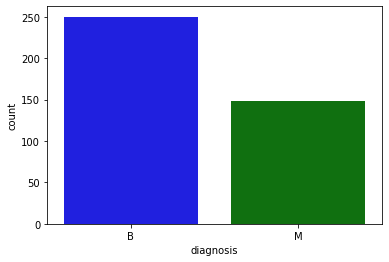

In [ ]:
#Visualize this count
sns.countplot(breast_data['diagnosis'],label = "Count", palette=sns.color_palette
              (['blue','green']),order=pd.value_counts(breast_data['diagnosis']).iloc[:398].index)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

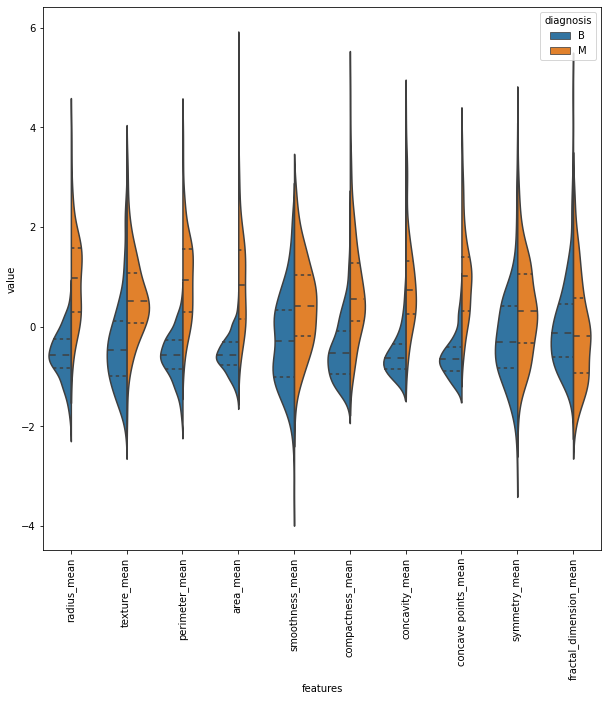

In [ ]:
# y includes diagnosis column with M or B values
y = breast_data.diagnosis

# drop diagnosis since we are separating labels and features
list= ['diagnosis']

#X includes our features
X = breast_data.drop(list,axis = 1)

# get the first ten features 
data_dia = y
data = X
data_std = (data - data.mean())/ (data.std()) #standardization
data = pd.concat([y,data_std.iloc[:,0:10]], axis=1)
data = pd.melt(data,id_vars ="diagnosis",var_name="features",value_name='value')

#make a violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

## **Correlation Map**

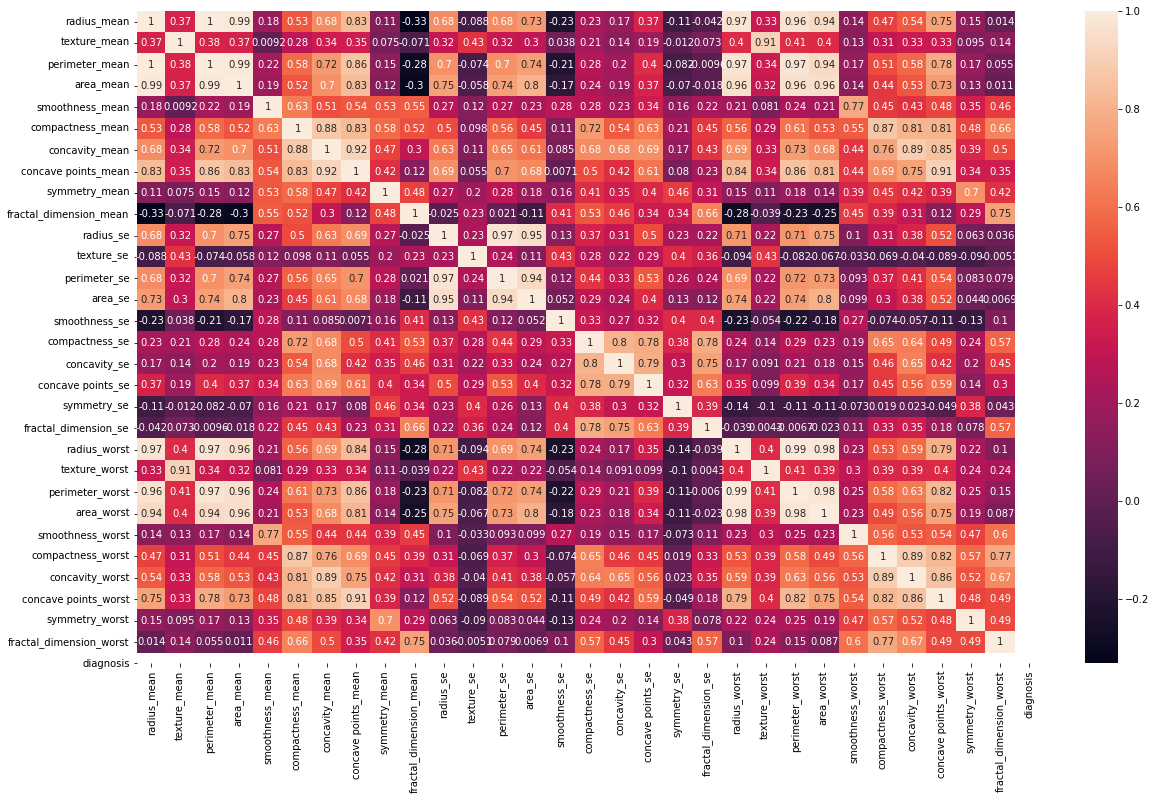

In [ ]:
#correlation map
breast_data_corr = breast_data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(breast_data_corr,cbar=True,annot=True,yticklabels=breast_data.columns,
            xticklabels=breast_data.columns)
plt.show()

The mean, std errors and worst dimension lengths of compactness, concavity, and concave points of tumors are correlated with a correlation greater than 0.8. The mean, std errors, and worst dimensions of radius, perimeter, and area of tumors correlate 1. Texture_mean and texture_worst correlate 0.9. area_worst and area_mean correlate 1.

## **Boxplot IQR**

Boxplot succinctly compare multiple distributions and are a great way to visualize the IQR

Text(0.5, 1.0, 'Graph of Texture Mean vs Diagnosis of Tumor')

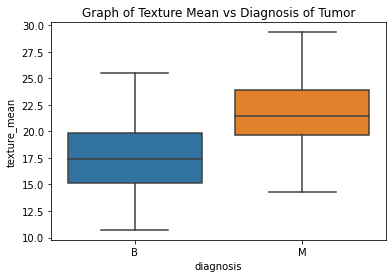

In [ ]:
#create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='texture_mean', data = breast_data, showfliers = False)
plot.set_title("Graph of Texture Mean vs Diagnosis of Tumor")

Text(0.5, 1.0, 'Graph of Area se vs Diagnosis of Tumor')

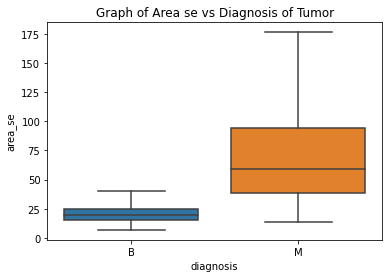

In [ ]:
#create boxplots for area se vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='area_se', data = breast_data, showfliers = False)
plot.set_title("Graph of Area se vs Diagnosis of Tumor")


Text(0.5, 1.0, 'Graph of Concave Points se vs Diagnosis of Tumor')

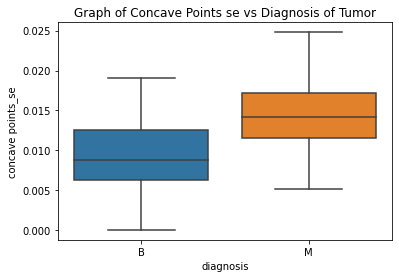

In [ ]:
plot = sns.boxplot(x='diagnosis', y='concave points_se', data = breast_data, showfliers = False)
plot.set_title("Graph of Concave Points se vs Diagnosis of Tumor")

Text(0.5, 1.0, 'Graph of Area worst vs Diagnosis of Tumor')

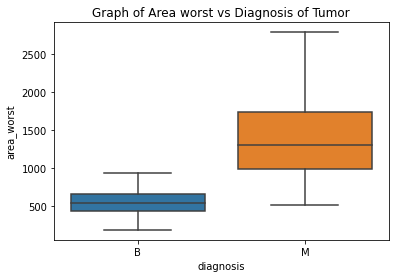

In [ ]:
#create boxplots for area worst vs diagnosis of tumor
plot = sns.boxplot(x='diagnosis', y='area_worst', data = breast_data, showfliers = False)
plot.set_title("Graph of Area worst vs Diagnosis of Tumor")


Comparing Area Worst feature for B and M group

## **Printing Feature with High Correlation**

In [ ]:
high_correlation = breast_data_corr.abs()
high_correlation_unstack=high_correlation.unstack()
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)
print(high_correlation_sort[30:35])

perimeter_mean   radius_mean        0.997984
radius_mean      perimeter_mean     0.997984
perimeter_worst  radius_worst       0.994106
radius_worst     perimeter_worst    0.994106
area_mean        radius_mean        0.986661
dtype: float64


By plotting the distribution of features with the highest correlation with "radius_mean and perimeter_mean" it gave 0.997984 and "perimeter_worst and radius_worst" has 0.9941.

## **Oversampling of Data**

In [ ]:
# Oversampling of data
y = breast_data['diagnosis']
X = breast_data.drop(['diagnosis'], axis = 1)
x_cols =X.columns.to_list()

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


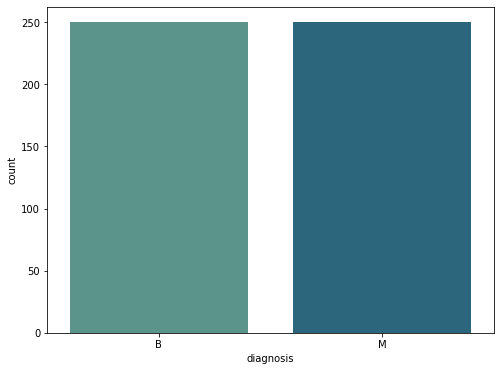

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(y,palette ='crest')

From the above plot, it can be shown that the oversampling of data is somehow balanced.

## **Split the data into Train and Test Sets**


In [ ]:
X = breast_data.drop("diagnosis",axis=1)
y = breast_data.diagnosis.map({'B':0,'M':1}).astype(np.int)

The train to test ratio should be 80:20 and the random_state should be 0.

In [ ]:
# The train to test ratio should be 80:20 and the random_stae should be 0.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =20, random_state=0)
X_train.shape, X_test.shape

((378, 30), (20, 30))

In [ ]:
!pip install eli5
import eli5
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
!pip install pdpbox
import pdpbox
from pdpbox.pdp import *
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
!pip install shap
import shap
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
from shap import TreeExplainer
from scipy.special import expit
from shap import force_plot, TreeExplainer, initjs
from interpret.blackbox import LimeTabular,PartialDependence,MorrisSensitivity
from interpret import show

# **Task 2**

## **Use Random Forest Machine Learning Model for prediction**

In [ ]:
model = RandomForestClassifier(n_estimators=400,criterion='entropy',
                               random_state=1,n_jobs=-1, max_depth=5)


## **Fitting the model**

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=400,
                       n_jobs=-1, random_state=1)

## **Predicting on X_test set**

In [ ]:
y_pred = model.predict(X_test)

## **Average Impact on predicted diagnosis**

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving dashboard.png to dashboard.png


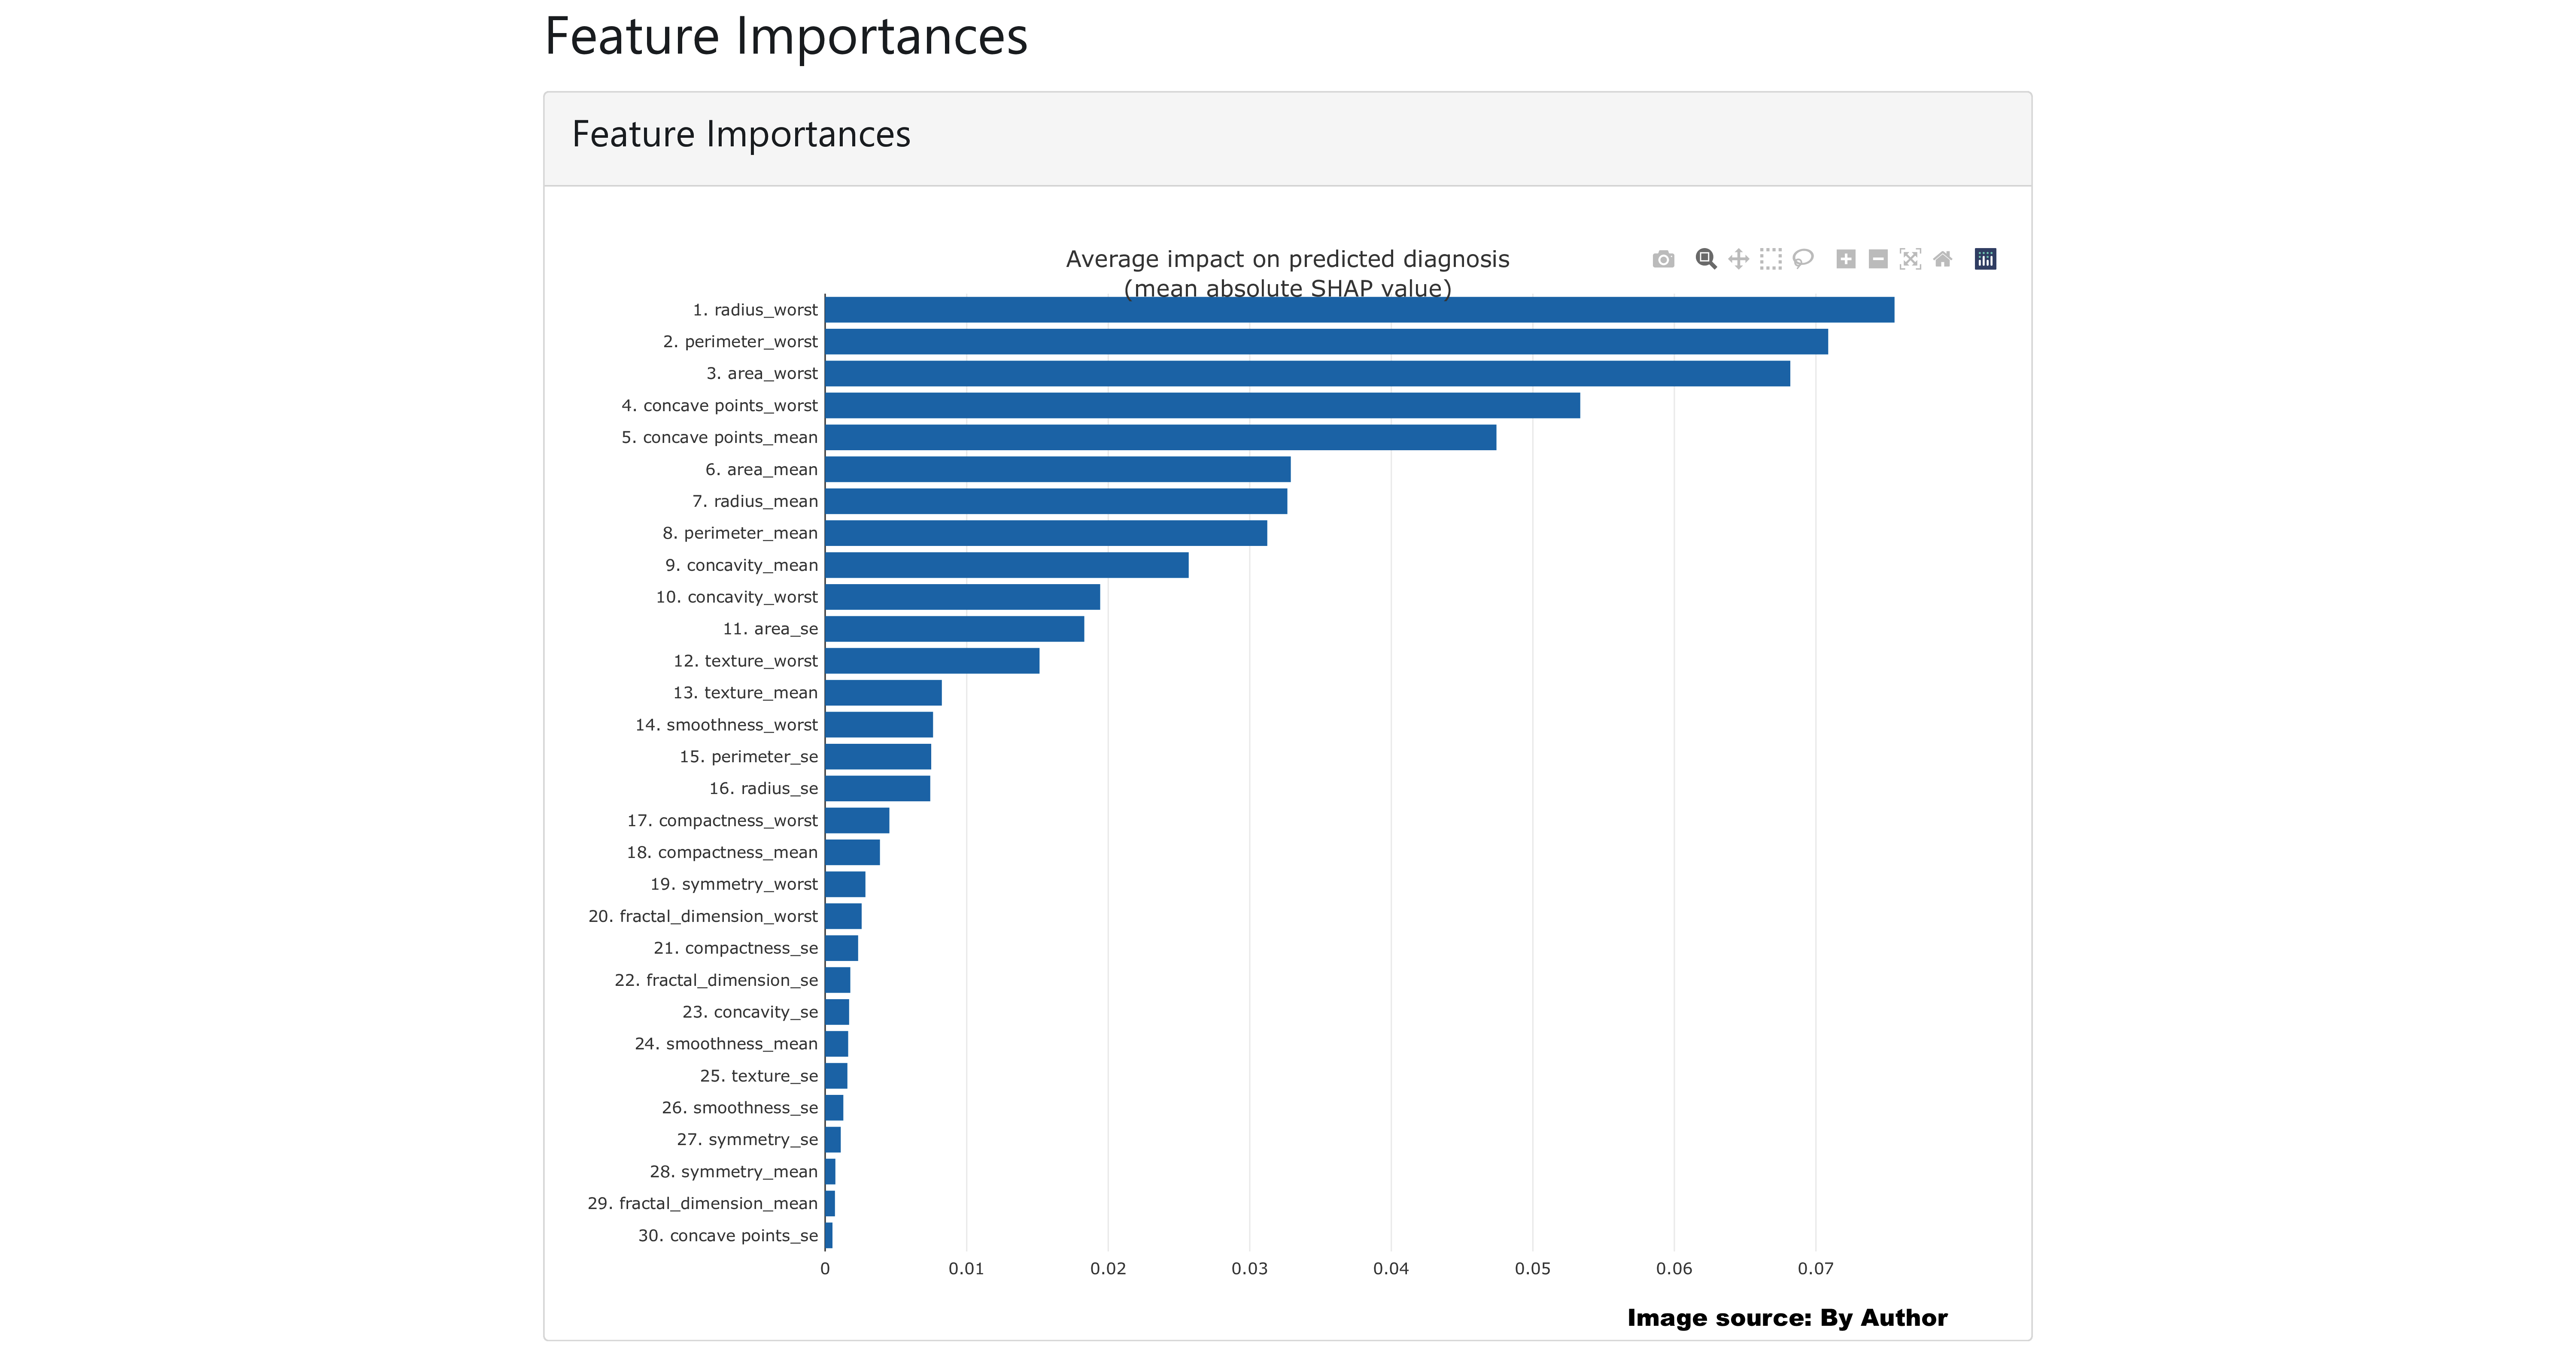

In [ ]:
Image('dashboard.png',width=800)

The average scores above are the average impact on prediction for each variable. The radius worst and perimeter worst are the top 2 features. The individual score of each is above 0.07. 


## **Evaluate the model using Accuracy Score**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

score = accuracy_score(y_test,y_pred)

# view the accuracy of our full feature
print("Accuracy:", score)


Accuracy: 0.95


In [ ]:
uploaded = files.upload()

Saving dashboard (1).png to dashboard (1).png


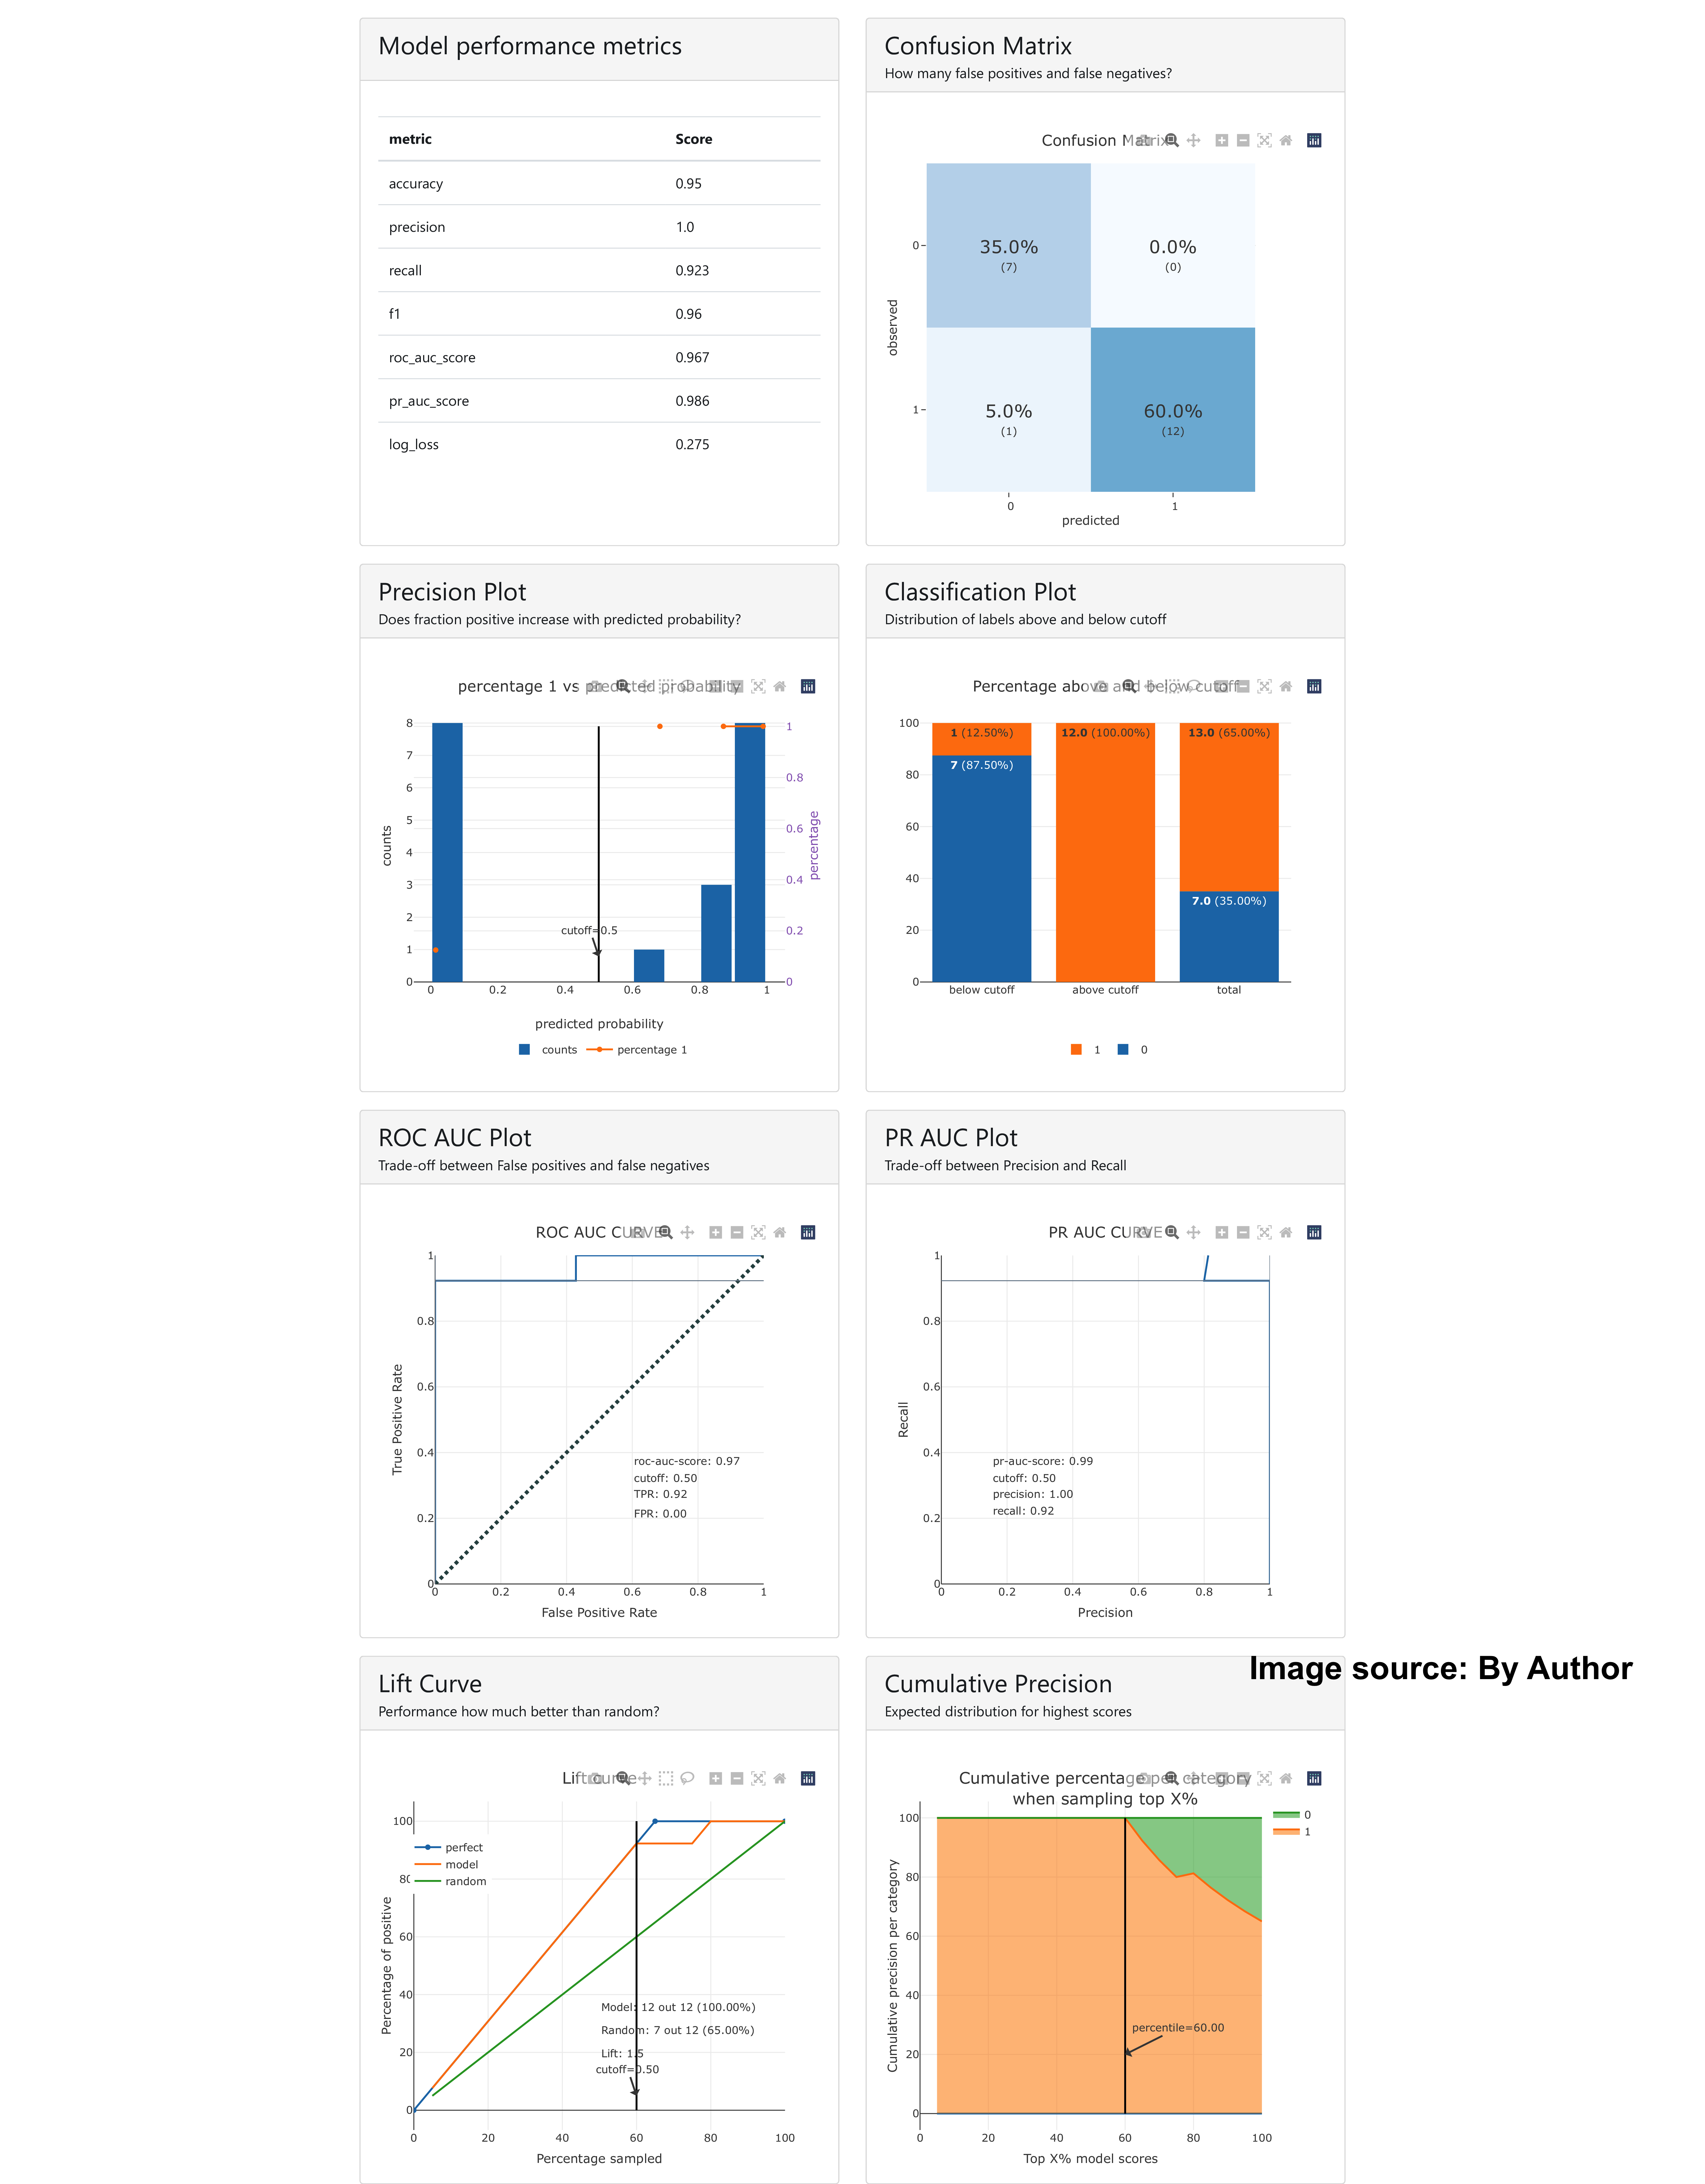

In [ ]:
Image('dashboard (1).png',width=600)

# **Task 3: Explaining the model with SHAP and Lime.**

In [ ]:
import joblib
filename = './model.pkl'
_ = joblib.dump(model, filename)

In [ ]:
# Apply lime

lime = LimeTabular(predict_fn=model.predict_proba,data=X_train,random_state=0,
                   feature_names=x_cols, n_jobs=-1)

#Get local explanations
lime_local = lime.explain_local(X_test[-25:],y_test[-25:], name='LIME')

show(lime_local)

In [ ]:
uploaded = files.upload()

Saving Screen Shot 2022-05-11 at 9.05.34 AM.png to Screen Shot 2022-05-11 at 9.05.34 AM.png


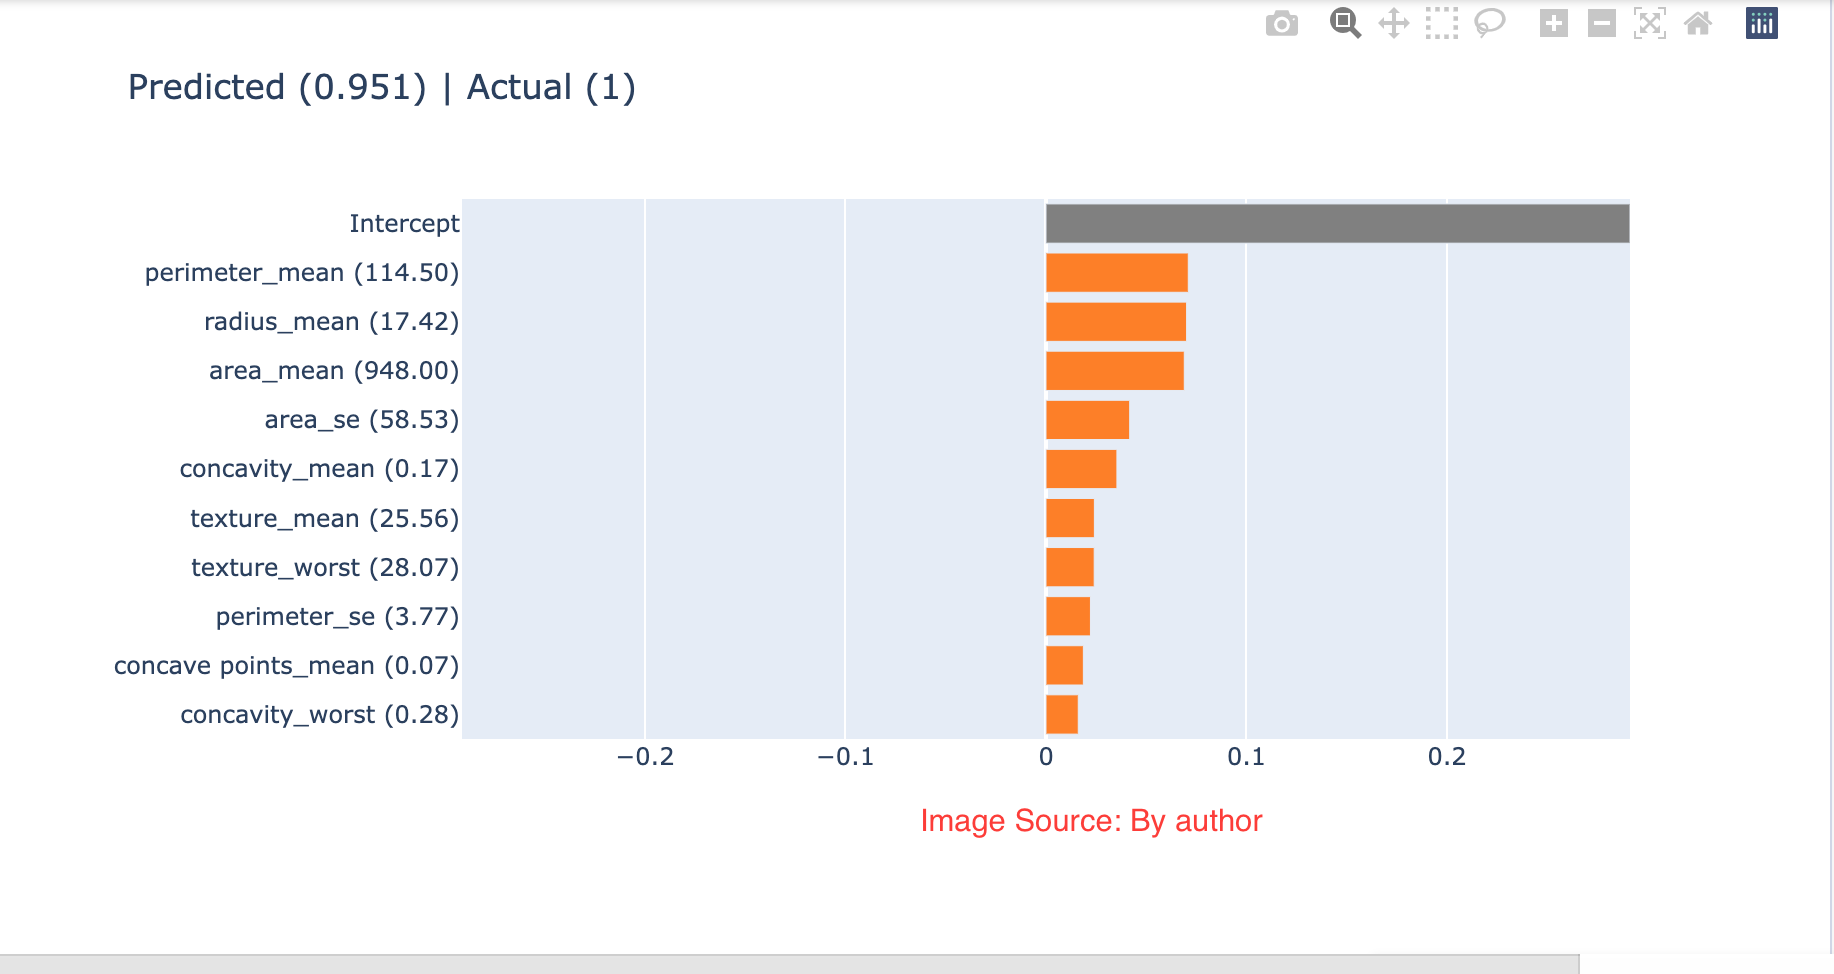

In [ ]:
Image('Screen Shot 2022-05-11 at 9.05.34 AM.png',width=650)

**Predicted(0.951)|Actual(1)**
LIME is an explanatory simplification post XAI method, which can explain a single prediction generated by any black-box model. It explains a prediction by replacing the complex model with a locally interpretable surrogate model. LIME to interpret a black-box model's prediction. More specifically the features "perimeter mean", "radius mean", "area mean", "area_se", "concavity mean", "mean texture","texture worst", "perimeter_se" "concave points mean",and "concavity worst"  has a positive effect on the prediction.

##  **Use a SHAP Explainer to derive SHAP Values for the random forest ml model.**

In [ ]:
#creating an explainer for our model
explainer = shap.TreeExplainer(model)


##**Calculating the SHAP value**

In [ ]:
shap_values = explainer.shap_values(X_test)

###**Displayed the expected value**

In [ ]:
print('Expected Value:',explainer.expected_value)


Expected Value: [0.6423082 0.3576918]


## **Write your inferences from the generated plot.**

It shows the expected value is 0.6423 and 0.3576, the SHAP values for the random forest machine learning model.

# **Task 4**

## **Plot a SHAP force plot for the first row of test data.**

In [ ]:
#Generate force plot -single row
shap.initjs()
shap_values_first_row = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0],shap_values_first_row[0], X_test.iloc[0])

## **Write your inferences from the generated plot.**

As we can see from the above force plot, gave a 0.6423 baseline SHAP value and shows a lower or higher prediction, which is perimeter_worst, concave point_mean, concave point_worst,concavity_worst,concavity_mean, and texture_worst decrease the model prediction. and the red color represents an increase and the blue one represents a decrease in positive weight in our model. This test sample has a high low risk to develop breast cancer as a benign tumor.

# **Task 5**

## **Plot a SHAP force plot for all the rows of the data**

In [ ]:
#Generate force plot -multiple rows
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[:,:], X_test.iloc[:,:])


## **Write your inferences from the generated plot.**

The force plot gave a 0.6423 baseline SHAP value and shows a lower or higher prediction, which is perimeter_worst, concave point_mean, concave point_worst,concavity_worst,concavity_mean, and texture_worst decrease the model prediction. and the red color represents an increase and the blue one represents a decrease in positive weight in our model. This test sample has a high low risk to develop breast cancer as a benign tumor.

# **Task 6**

## **Plot a SHAP summary plot using all the features in the data**

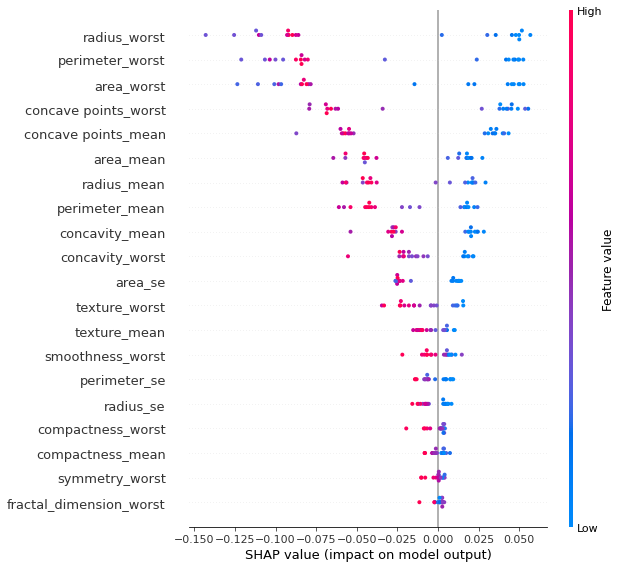

In [ ]:
#Shap summary plot
shap.summary_plot(shap_values[0],X_test)

## **Write your inferences from the generated plot.**

The above force plot gave a 0.6423 baseline SHAP value and shows a lower or higher prediction, which is perimeter_worst, concave point_mean, concave point_worst,concavity_worst,concavity_mean, and texture_worst increase the model prediction. and red color dots represent the positive weight and blue dots represent a decrease in negative weight in our model. This test sample has a high and low risk to develop breast cancer as a malignant and benign tumor.

## **Creating and Install a ExplainerDashboard**

Explainer Dashbord is a library or quickly build interactive dashboard for analyzing and explaning the predictions and machine learning models. its generate layout calculating such as Calculating shap values,Calculating prediction probabilities,Calculating metrics,Calculating confusion matrices,Calculating classification_dfs,Calculating roc auc curves,Calculating pr auc curves,Calculating liftcurve_dfs,Calculating shap interaction values,Calculating dependencies,Calculating permutation importances, Calculating predictions, Calculating pred_percentiles and
Calculating ShadowDecTree for each decision tree.

In [ ]:
!pip install explainerdashboard

In [ ]:
from explainerdashboard import ClassifierExplainer
from dash import html

In [ ]:
explainer = ClassifierExplainer(model,X_test,y_test)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [ ]:
from explainerdashboard import ExplainerDashboard
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e

<IPython.core.display.Javascript object>

# **Task 7**

##**Plot a SHAP Dependence Plot using all features in the data**

In [ ]:
uploaded = files.upload()

Saving dashboard (4).png to dashboard (4) (1).png


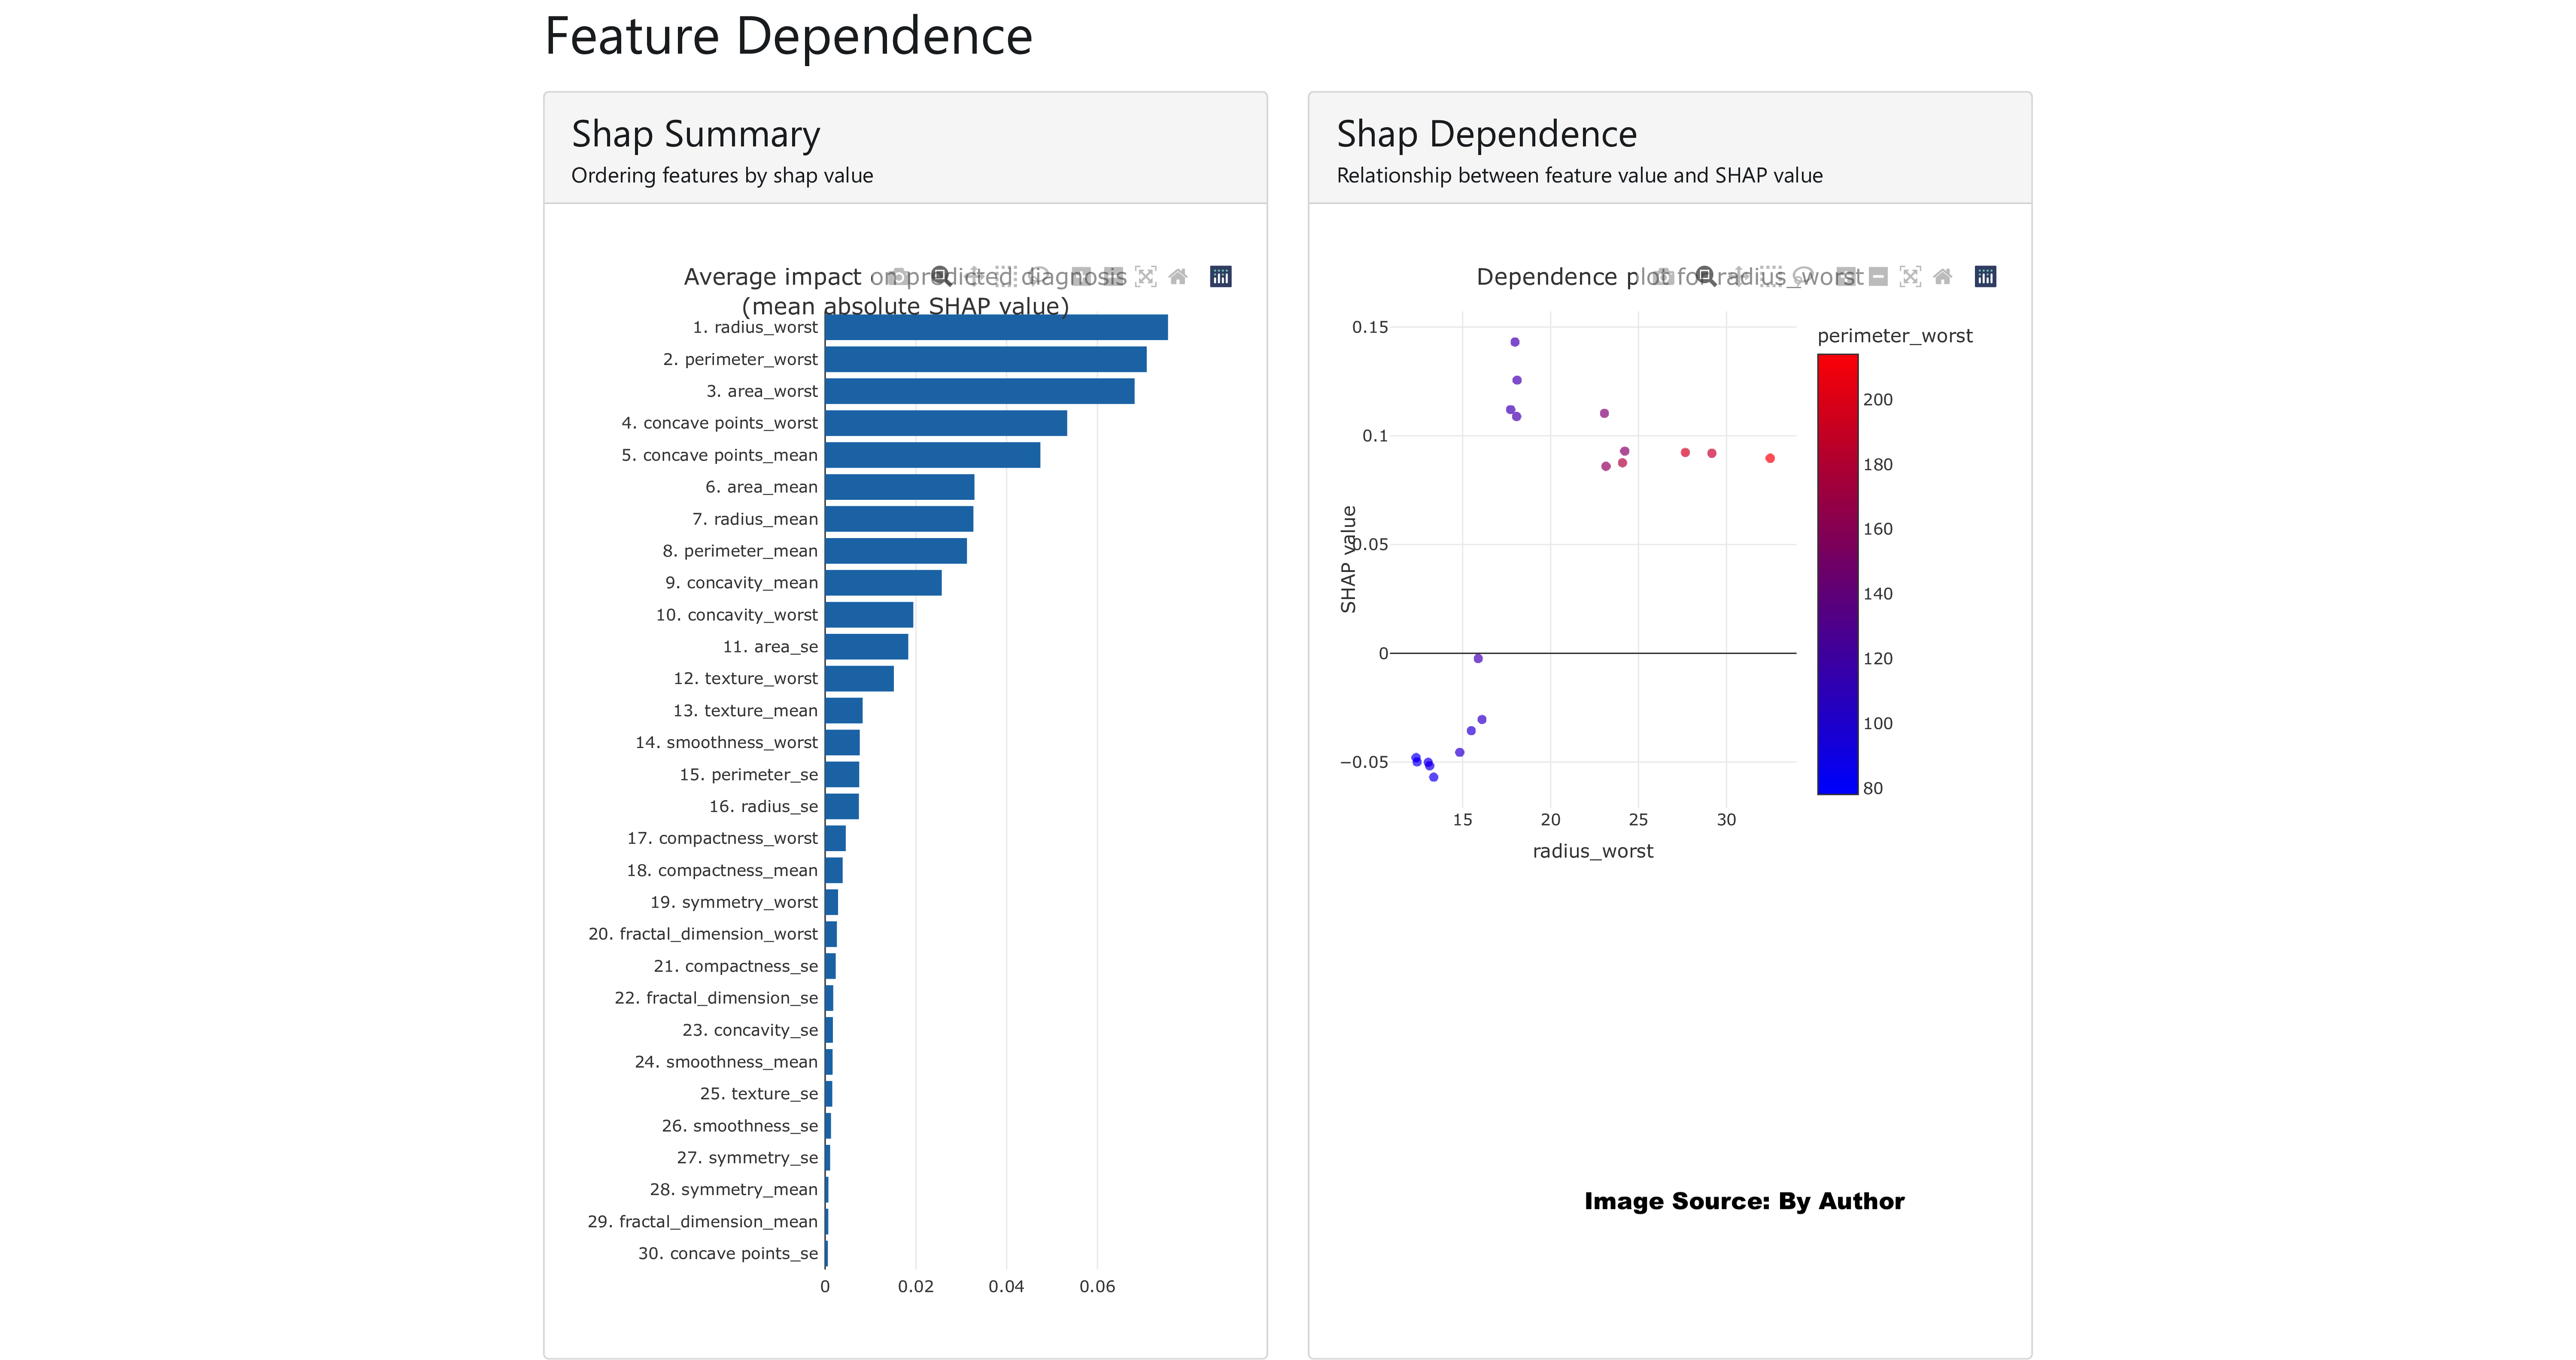

In [ ]:
Image('dashboard (4) (1).png',width=650)

## **Write your inferences from the generated plot.**

SHAP Dependence - Relationship between feature value and SHAP value of perimeter_worst and radius_worst, and the SHAP Summary the first top 3 are radius_worst,perimeter_worst and area worst increase to 0.06.

# **Task 8 (Optional)**

## **Do anything and everything with SHAP**
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

In [ ]:
uploaded = files.upload()

Saving dashboard (5).png to dashboard (5).png


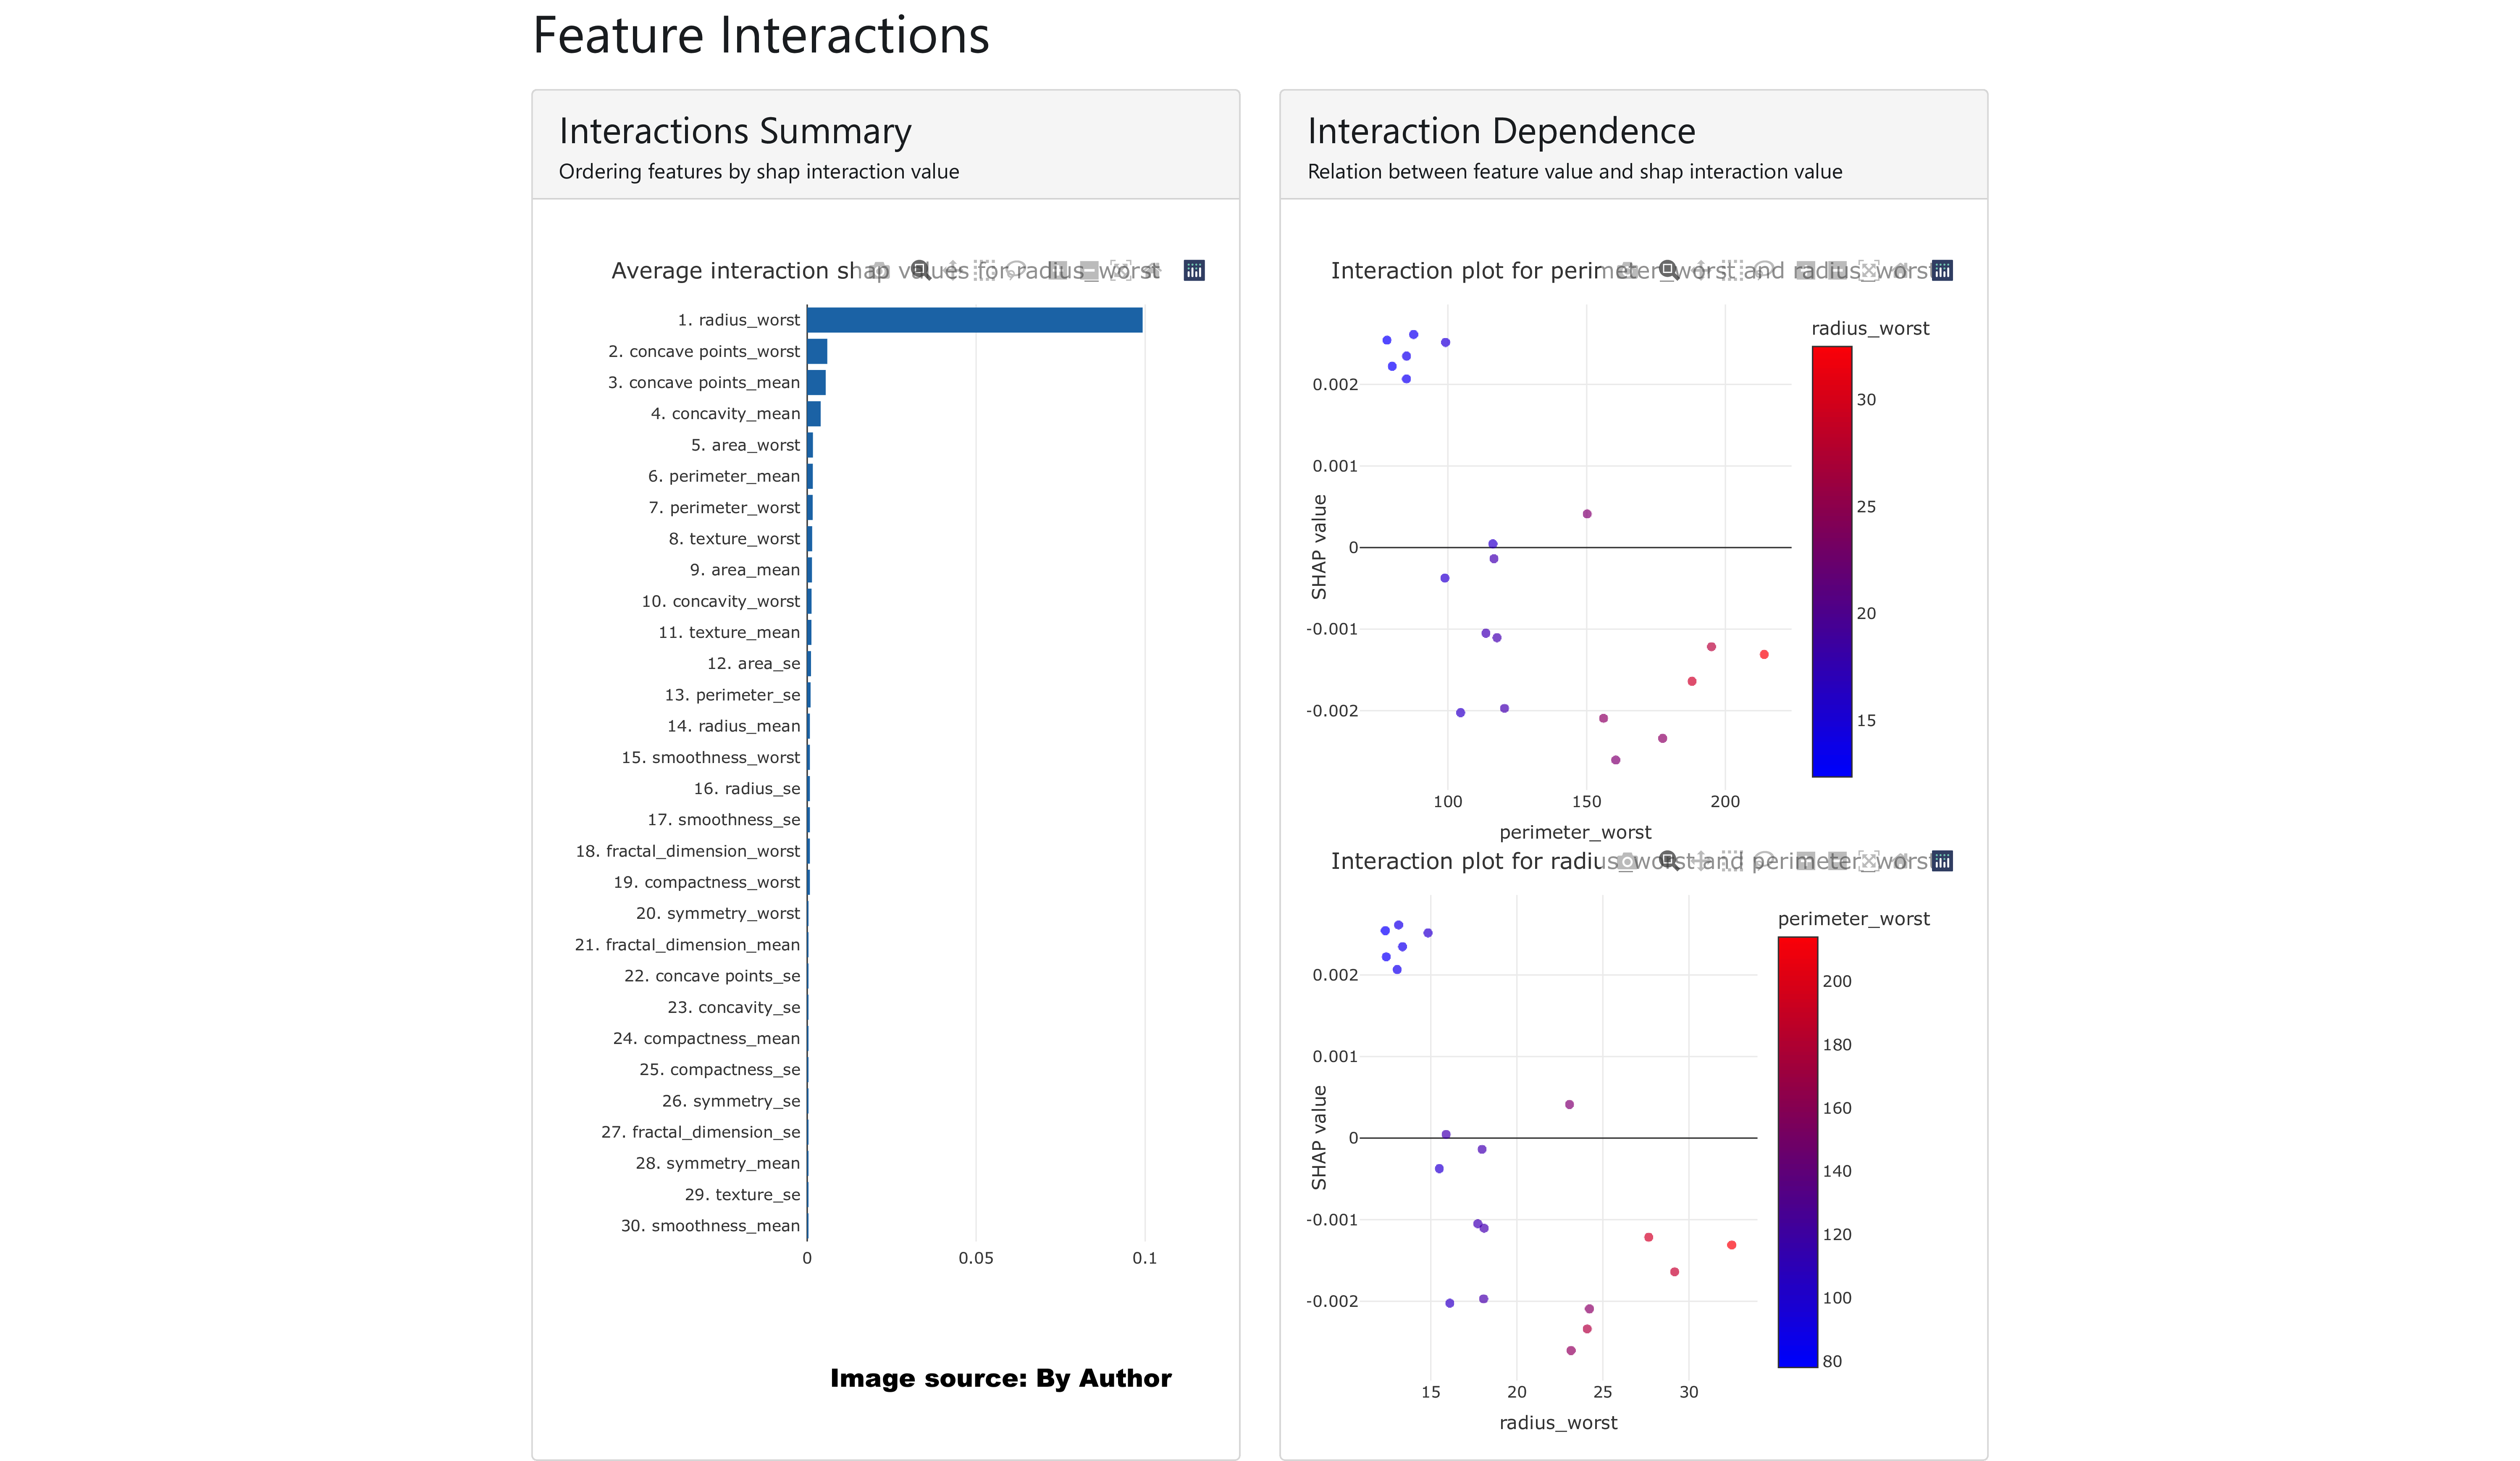

In [ ]:
Image('dashboard (5).png',width=800)

This Interaction Summary - ordering features by shap interaction value, and Interaction Dependence - the relationship between features value and shap interaction value. 

In [ ]:
uploaded = files.upload()

Saving dashboard (3).png to dashboard (3).png


In [ ]:
Image('dashboard (3).png',width=700)

As we can saw the **What if** dashboard all features of the dataset are there such as prediction, feature input, contributions plot, Partial Dependence plot, and conversion table results.